In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

Using TensorFlow backend.
C:\Users\farshad\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\farshad\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\farshad\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\farshad\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [2]:
labels = ['nissan', 'pegu','samand','pride','toyota']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
#Now we can easily fetch our train and validation data.
train = get_data('./Divar_image/train')
val =   get_data('./Divar_image/test')

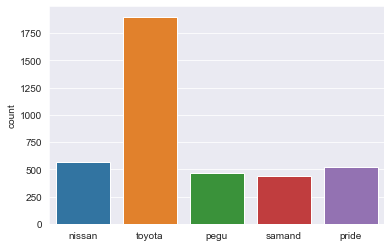

In [4]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("nissan")
    if(i[1] == 1):
        l.append("pegu")
    if(i[1] == 2):
        l.append("samand")
    if(i[1] == 3):
        l.append("pride")
    else:
        l.append("toyota")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'nissan')

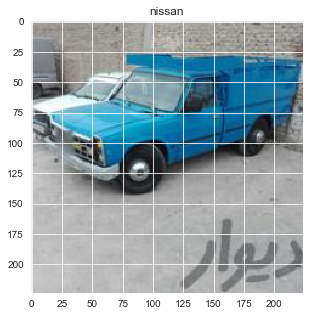

In [5]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

In [6]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [7]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(5, activation="softmax"))


model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 64)      

In [8]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 200 , validation_data = (x_val, y_val))


Train on 2418 samples, validate on 1462 samples
Epoch 1/200
2418/2418 [==============================] - 162s 67ms/step - loss: 1.6079 - accuracy: 0.9396 - val_loss: 1.6105 - val_accuracy: 1.0000
Epoch 2/200
2418/2418 [==============================] - 163s 67ms/step - loss: 1.6064 - accuracy: 0.9996 - val_loss: 1.6109 - val_accuracy: 1.0000
Epoch 3/200
2418/2418 [==============================] - 175s 72ms/step - loss: 1.6041 - accuracy: 1.0000 - val_loss: 1.6113 - val_accuracy: 1.0000
Epoch 4/200
2418/2418 [==============================] - 177s 73ms/step - loss: 1.6015 - accuracy: 1.0000 - val_loss: 1.6120 - val_accuracy: 1.0000
Epoch 5/200
2418/2418 [==============================] - 174s 72ms/step - loss: 1.5986 - accuracy: 1.0000 - val_loss: 1.6122 - val_accuracy: 1.0000
Epoch 6/200
2418/2418 [==============================] - 189s 78ms/step - loss: 1.5961 - accuracy: 1.0000 - val_loss: 1.6125 - val_accuracy: 1.0000
Epoch 7/200
2418/2418 [==============================] - 170s 7

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['nissan (Class 0)','pegu (Class 1)','samand (Class 2)','pride (Class 3)','toyota (Class 4)']))

In [ ]:
#developing a model
from sklearn.tree import DecisionTreeClassifier
x_train = x_train.reshape(235,3*224*224)

clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)

clf_pruned.fit(x_train, y_train)#visualizing the tree





In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
x_val = x_val.reshape(157,3*224*224)
y_pred = clf_pruned.predict(x_val)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())